In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

In [2]:
# load data
def LoadDataFromCSV(path):
    df = pd.read_csv(path)
    return df

df = LoadDataFromCSV('/home/sebastian/PythonProjects/JupyterLab/data/data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
None


In [3]:
# normalize data
X = np.array(df['SAT'].values).reshape(-1,1)
y = np.array(df['GPA'].values)

In [4]:
# cut data
def CutDataTrainTest(X, y, train_s, show_info=True):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, train_size=train_s)
    if show_info:
        print("Train -> %s/%s <- Test" % 
          (X_tr.shape[0], X_ts.shape[0]))
    return X_tr, X_ts, y_tr, y_ts
 
X_train, X_test, y_train, y_test = CutDataTrainTest(X, y, 0.7)

Train -> 58/26 <- Test


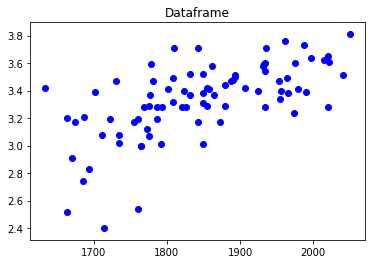

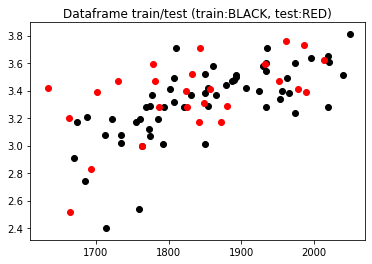

In [5]:
# show data as plot
def ShowData(X, y, title):
    plt.scatter(X,y, color="blue")
    plt.title(title)
    plt.show()
    
# ShowDataTrainTest()
def ShowDataTT(X_tr, X_ts, y_tr, y_ts): 
    plt.scatter(X_tr, y_tr, color="black")
    plt.scatter(X_ts, y_ts, color="red")
    plt.title("Dataframe train/test (train:BLACK, test:RED)")
    plt.show()

ShowData(X, y, "Dataframe")
ShowDataTT(X_train, X_test, y_train, y_test)

In [6]:
# create model and train this!
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# test data
y_pred = reg.predict(X_test)
output_error = np.zeros(len(y_pred)).reshape(-1,1)

index = 0
for output, target in list(zip(y_pred, y_test)):
    output_error[index] = target-output
    index += 1
    
print("Mean absolute error is: %s percent!" % (float(int(mean_absolute_error(y_test, y_pred) * 10000) / 100)))
print("Score of model: %s percent" % (float(int(reg.score(X_test, y_test) * 10000) / 100)))

Mean absolute error is: 19.96 percent!
Score of model: 18.49 percent


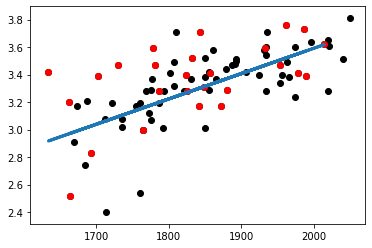

In [8]:
plt.scatter(X, y, color="black")
plt.scatter(X_test, y_test, color="red")
n=plt.plot(X_test, y_pred, linewidth=3)

In [9]:
n=56

if n in range(84):
    x=X[n]
    print("X[%s]: %s\ny[%s]: %s\n" % (n, X[n], n, y[n]))
    print("Prediction for %s: %s\n" % (x, reg.predict(np.array(x).reshape(-1,1))))
else:
    print("Error with n! n is 0-83 index!")

X[56]: [1730]
y[56]: 3.47

Prediction for [1730]: [3.09333302]



In [10]:
Xx = np.array([5000]).reshape(-1,1)
reg.predict(Xx)

array([9.11216526])